![example](images/House-Sales.jpeg)

# House sales in Northwest County

**Authors:** Ngoc Ho
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.
This project will build a multiple linear regression model to predict house prices in King County, Seattle, WA. The model will be derived from King County house sale dataset. 

## Business Problem

A Seattle realestate company wants to establish an evaluation system for houses to provide a price appraisal and selling strategies to their clients. Having an accurate house price predictor will help the company build their reputation by gaining invaluable trust from their clients. For the client, this will help maximise their selling/investing potentials and for the compant this will help increase their client number and increase commission. 

The main data analysis questions we will be focusing on are:
1. Does renovation have any effect on property value? if so how much?
2. Does the number of bedrooms/bathrooms affect property value? if so how much? ( is it worth to extend your house if you decided to do renovation to increase property value?
3. Does size of property and its condition, grading has any effect on the property value?
Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE, RFECV
from sklearn import metrics
import pickle
%matplotlib inline

In [38]:
# Here you run your code to explore the data
df = pd.read_csv('data/kc_house_data.csv')
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [36]:
df.date.sorted()

AttributeError: 'DataFrame' object has no attribute 'date'

**Target variables are:**
- price 
- yr_renovated
- bedrooms
- bathrooms
- sqft_living
- date

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

**Checking for nulls**

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**Checking for duplicates**

In [6]:
df.duplicated().sum()
#no duplicates 

0

**Waterfront, view and yr_renovated columns have null values. They need to be dealt with before regression analysis because regression will not work with non numeric values.**

In [7]:
#waterfront 
df.view.fillna('No', inplace=True)
df.view.value_counts(normalize=True)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
No     0.002917
Name: view, dtype: float64

In [8]:
# view 
df.view.fillna('No', inplace=True)
df.view.value_counts(normalize=True)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
No     0.002917
Name: view, dtype: float64

**yr_renovated cleaning**

In [9]:
df.yr_renovated.unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [10]:
df.yr_renovated.value_counts(normalize=True)

0.0       0.958096
2014.0    0.004112
2003.0    0.001746
2013.0    0.001746
2007.0    0.001690
            ...   
1946.0    0.000056
1959.0    0.000056
1971.0    0.000056
1951.0    0.000056
1954.0    0.000056
Name: yr_renovated, Length: 70, dtype: float64

In [11]:
year = [1991., 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.]
df.yr_renovated.replace([year], 'Yes', inplace=True)
df.yr_renovated.head()

0      0
1    Yes
2    NaN
3      0
4      0
Name: yr_renovated, dtype: object

In [12]:
df.yr_renovated.replace(0,'No', inplace=True)

In [13]:
df.yr_renovated.fillna('No', inplace=True)

In [14]:
df.yr_renovated.value_counts(normalize=True)

No     0.965551
Yes    0.034449
Name: yr_renovated, dtype: float64

**Visualising renovated feature**

<AxesSubplot:>

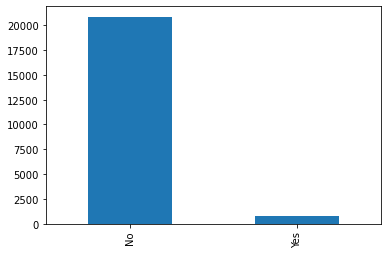

In [15]:
reno = df.yr_renovated.value_counts()
reno.plot(kind='bar')

#Majority of houses has no renovation 

**date**

In [16]:
df.date

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [41]:
df['date_clean'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date_clean'].map(lambda x: x.day)
df['month_sold'] = df['date_clean'].map(lambda x: x.month)
df['year_sold'] = df['date_clean'].map(lambda x: x.year)

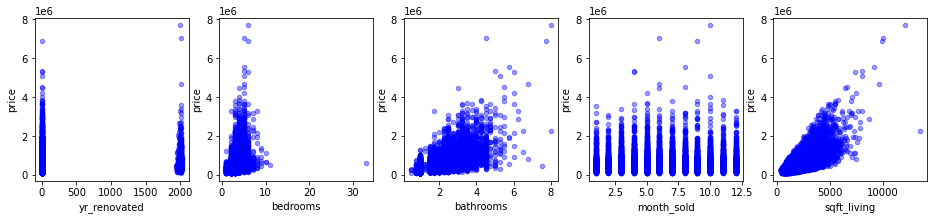

In [42]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16,3))

for xcol, ax in zip(['yr_renovated', 'bedrooms', 'bathrooms', 'month_sold', 'sqft_living'], axes):
    df.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [43]:
df.sqft_basement.unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [44]:
df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'})
df['sqft_basement'] = df['sqft_basement'].astype(float)

In [45]:
#Creating dummies for waterfront and view
waterfront_dummies = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)
view_dummies = pd.get_dummies(df['view'], prefix='view', drop_first=True)
renovated_dummies = pd.get_dummies(df['yr_renovated'], prefix='reno', drop_first=True)
df = df.drop(['waterfront','view','yr_renovated', 'date', 'date_clean'], axis=1)
df = pd.concat([df, waterfront_dummies, view_dummies, renovated_dummies], axis=1)
df.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,reno_2006.0,reno_2007.0,reno_2008.0,reno_2009.0,reno_2010.0,reno_2011.0,reno_2012.0,reno_2013.0,reno_2014.0,reno_2015.0
0,7129300520,221900.0,3,1.00,1180,5650,1.0,3,7,1180,...,0,0,0,0,0,0,0,0,0,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,3,7,2170,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2,1.00,770,10000,1.0,3,6,770,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,5,7,1050,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,3,8,1680,...,0,0,0,0,0,0,0,0,0,0


In [49]:
df.isna().sum()

id             0
price          0
bedrooms       0
bathrooms      0
sqft_living    0
              ..
reno_2011.0    0
reno_2012.0    0
reno_2013.0    0
reno_2014.0    0
reno_2015.0    0
Length: 94, dtype: int64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 27 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   condition      21597 non-null  int64  
 8   grade          21597 non-null  int64  
 9   sqft_above     21597 non-null  int64  
 10  sqft_basement  21597 non-null  float64
 11  yr_built       21597 non-null  int64  
 12  zipcode        21597 non-null  int64  
 13  lat            21597 non-null  float64
 14  long           21597 non-null  float64
 15  sqft_living15  21597 non-null  int64  
 16  sqft_lot15     21597 non-null  int64  
 17  day_sold       21597 non-null  int64  
 18  month_

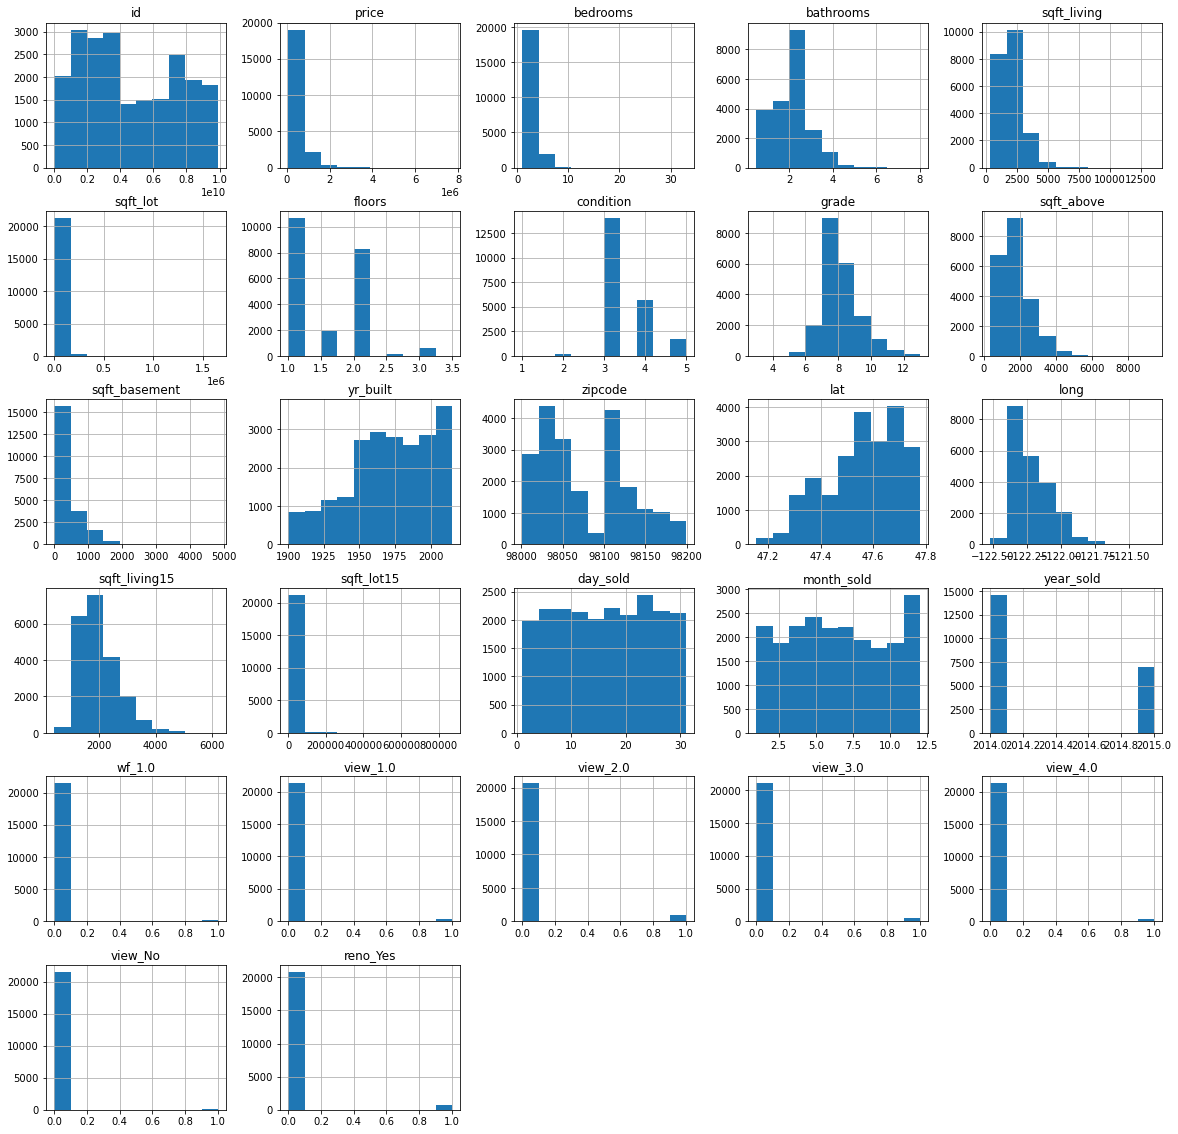

In [23]:
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (20,20))
ax = fig.gca()
df.hist(ax = ax);

In [24]:
df.rename(columns={"view_1.0": "view_1", "view_2.0": "view_2", 
                   "view_3.0": "view_3", "view_4.0": "view_4","wf_1.0": "wf_1"}, inplace=True)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

**Baseline Model**
- This model has all the features in the data

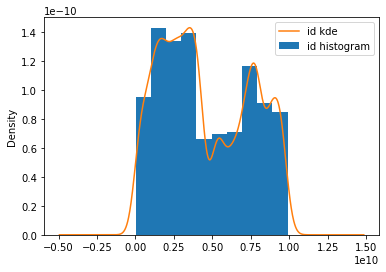

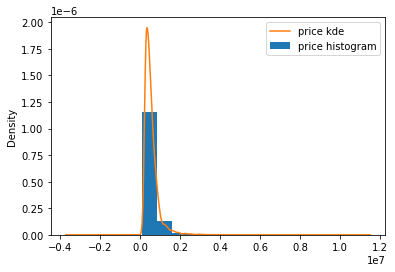

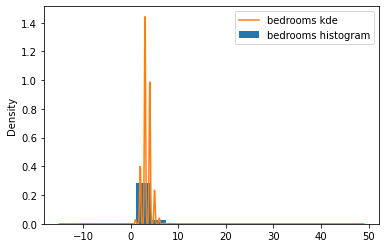

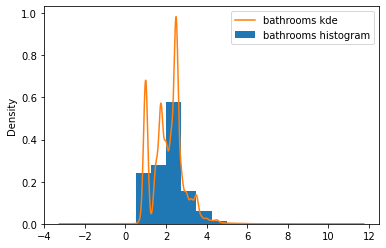

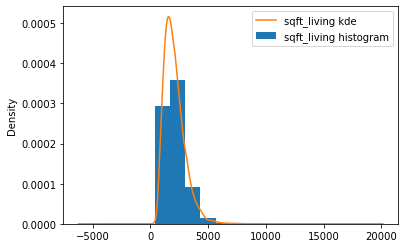

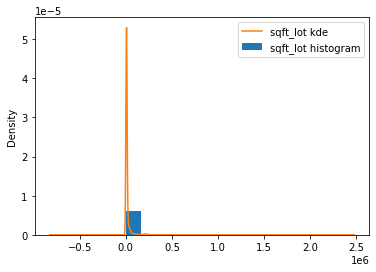

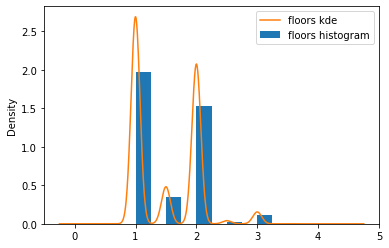

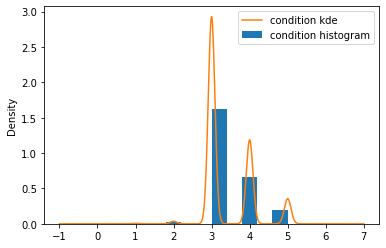

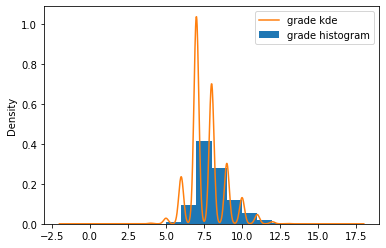

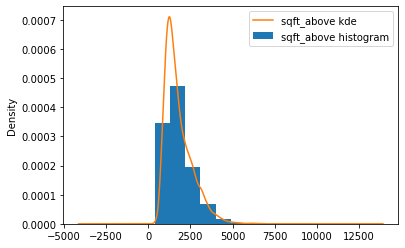

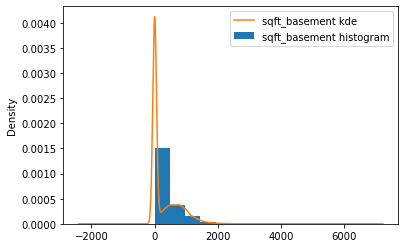

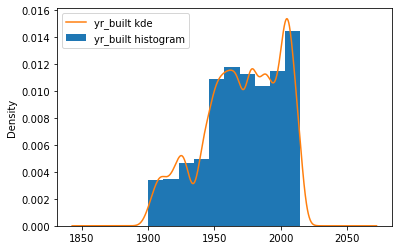

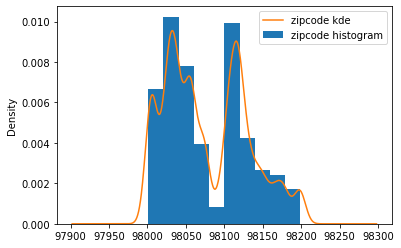

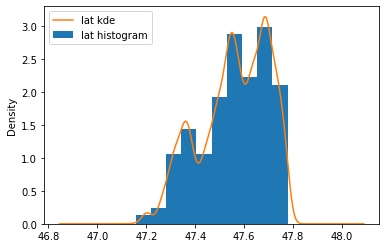

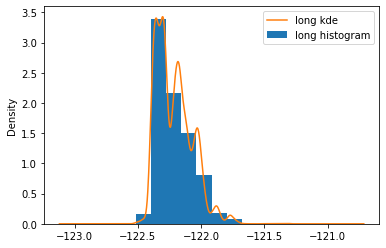

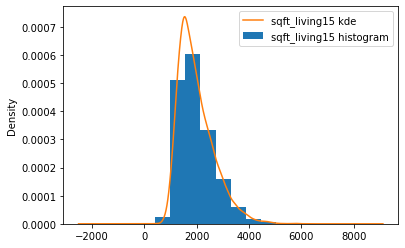

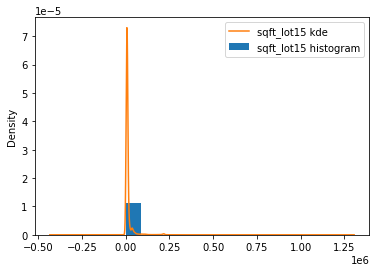

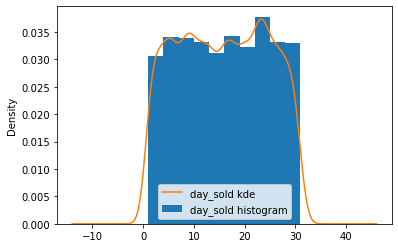

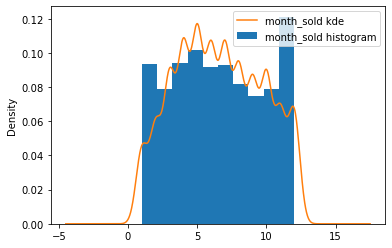

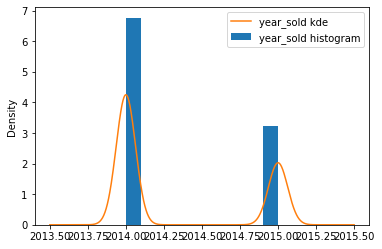

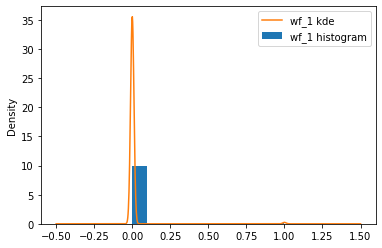

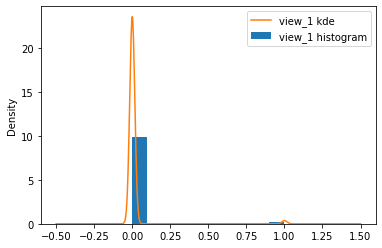

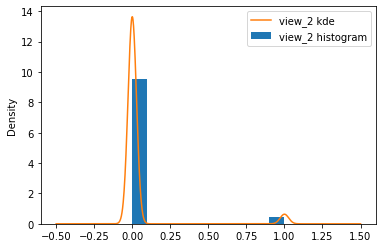

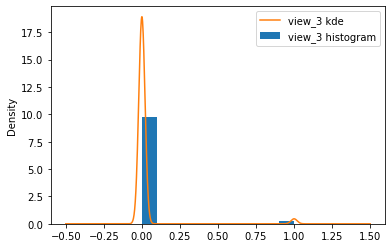

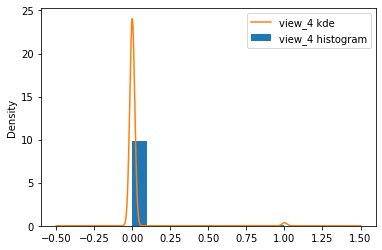

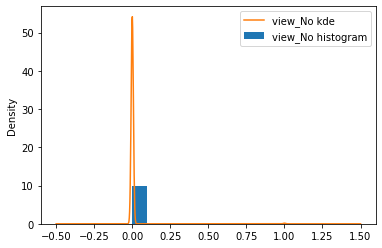

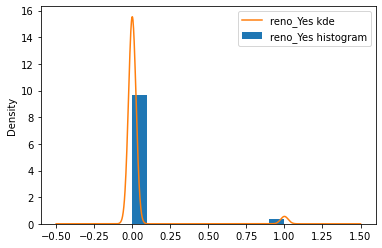

In [25]:
#check for normality with KDE plot 
for column in df:
    df[column].plot.hist(density=True, label = column+' histogram')
    df[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

All columns looked somewhat normal. Let's create a simple regression model with all features as our baseline 

In [26]:
outcome = 'price'
predictors = df.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.703
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     1967.
Date:                Wed, 08 Feb 2023   Prob (F-statistic):               0.00
Time:                        16:32:49   Log-Likelihood:            -2.9427e+05
No. Observations:               21597   AIC:                         5.886e+05
Df Residuals:                   21570   BIC:                         5.888e+05
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -6.607e+07   9.95e+06     -6.641      0.000   -8.56e+07   -4.66e+07
id            -1.374e-06    4.8e-07     -2.861      0.004   -2.32e-06   -4.33e-07
bedrooms      -3.592e+04   1891.214    -18.992      0.000   -3.96e+04   -3.22e+04
bathrooms       4.23e+04   3246.455     13.028      0.000    3.59e+04    4.87e+04
sqft_living     107.8722     17.990      5.996      0.000      72.611     143.134
sqft_lot          0.1248      0.048      2.614      0.009       0.031       0.218
floors         8096.6425   3583.608      2.259      0.024    1072.505    1.51e+04
condition      2.772e+04   2338.965     11.854      0.000    2.31e+04    3.23e+04
grade           9.74e+04   2150.531     45.291      0.000    9.32e+04    1.02e+05
sqft_above       72.4175     17.983      4.027      0.000      37.170     107.665
sqft_basement    41.5552     17.824      2.331      0.020       6.619      76.491
yr_built      -2659.1624     71.601    -37.138      0.000   -2799.506   -2518.818
zipcode        -583.7231     32.830    -17.780      0.000    -648.072    -519.375
lat            6.008e+05   1.07e+04     56.180      0.000     5.8e+05    6.22e+05
long          -2.122e+05   1.31e+04    -16.167      0.000   -2.38e+05   -1.86e+05
sqft_living15    20.9646      3.439      6.097      0.000      14.225      27.705
sqft_lot15       -0.3957      0.073     -5.409      0.000      -0.539      -0.252
day_sold       -361.5762    158.793     -2.277      0.023    -672.822     -50.330
month_sold     1129.7779    707.104      1.598      0.110    -256.197    2515.753
year_sold      3.642e+04   4711.112      7.731      0.000    2.72e+04    4.57e+04
wf_1           5.462e+05   2.03e+04     26.905      0.000    5.06e+05    5.86e+05
view_1         1.101e+05   1.13e+04      9.756      0.000     8.8e+04    1.32e+05
view_2         7.162e+04   6863.044     10.436      0.000    5.82e+04    8.51e+04
view_3          1.44e+05   9399.815     15.324      0.000    1.26e+05    1.62e+05
view_4         3.028e+05   1.42e+04     21.391      0.000    2.75e+05    3.31e+05
view_No        5.662e+04   2.53e+04      2.238      0.025    7039.098    1.06e+05
reno_Yes       4.694e+04   7903.457      5.939      0.000    3.14e+04    6.24e+04
==============================================================================
Omnibus:                    18386.220   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1897972.992
Skew:                           3.566   Prob(JB):                         0.00
Kurtosis:                      48.368   Cond. No.                     3.95e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.95e+13. This

**Evaluating Baseline model**

In [27]:
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=45)
baseline = LinearRegression()
baseline.fit(X_train, y_train)

y_hat_train = baseline.predict(X_train)
y_hat_test = baseline.predict(X_test)

from sklearn.metrics import mean_squared_error
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
RSME = test_mse - train_mse
print('Train Mean Squared Error:', train_mse)
print('Test Mean Squared Error:', test_mse)
print('RMSE:', RSME)

Train Mean Squared Error: 40189563876.87754
Test Mean Squared Error: 39727501693.06227
RMSE: -462062183.8152695


In [28]:
baseline = LinearRegression()
baseline.fit(X_train, y_train)
baseline.score(X_test, y_test)

print("Our R-squared on the testing set is:", baseline.score(X_test, y_test))


Our R-squared on the testing set is: 0.7032503293504964


From summary above, we can see from P-value for each individual features, almost every feature seems signficant except for month_sold and wf_No. Our adjusted R-square is reasonable however our condition number is very high suggesting high level of multicollinearity. High Jarque-Bera value also our model does not satisfy the normality assumption.  

Let's go back to our business problem and reconsider and select our main features. Based on our business problem is to appraise property and give advice whether renovation would increase property value. Our main focus is on the physical/structural state of the property regarless of location or views so we will only include features that contribute to the structure components. 

In [ ]:
#Check for linearity of independent variables 
#scatterplots 
pd.plotting.scatter_matrix(df,figsize  = [20, 20]);
plt.show()

In [ ]:
df.corr()
plt.figure(figsize=(50, 25))
sns.heatmap(data=df.corr(), annot=True);

In [ ]:
df.corr()

**Refined features:**
Here we select features with correlation of >= 0.5.  
- Bathrooms, sqft_living, grade, sqft_above, sqft_living15
From heat map and correlation maps above we see that these 5 features satisfy the linearity relationship with price

In [ ]:
df.columns

In [31]:
df_prep = df.drop(['reno_Yes', 'bedrooms','sqft_lot','floors','condition',
                   'sqft_basement','yr_built', 'zipcode','sqft_lot15' ], axis=1)

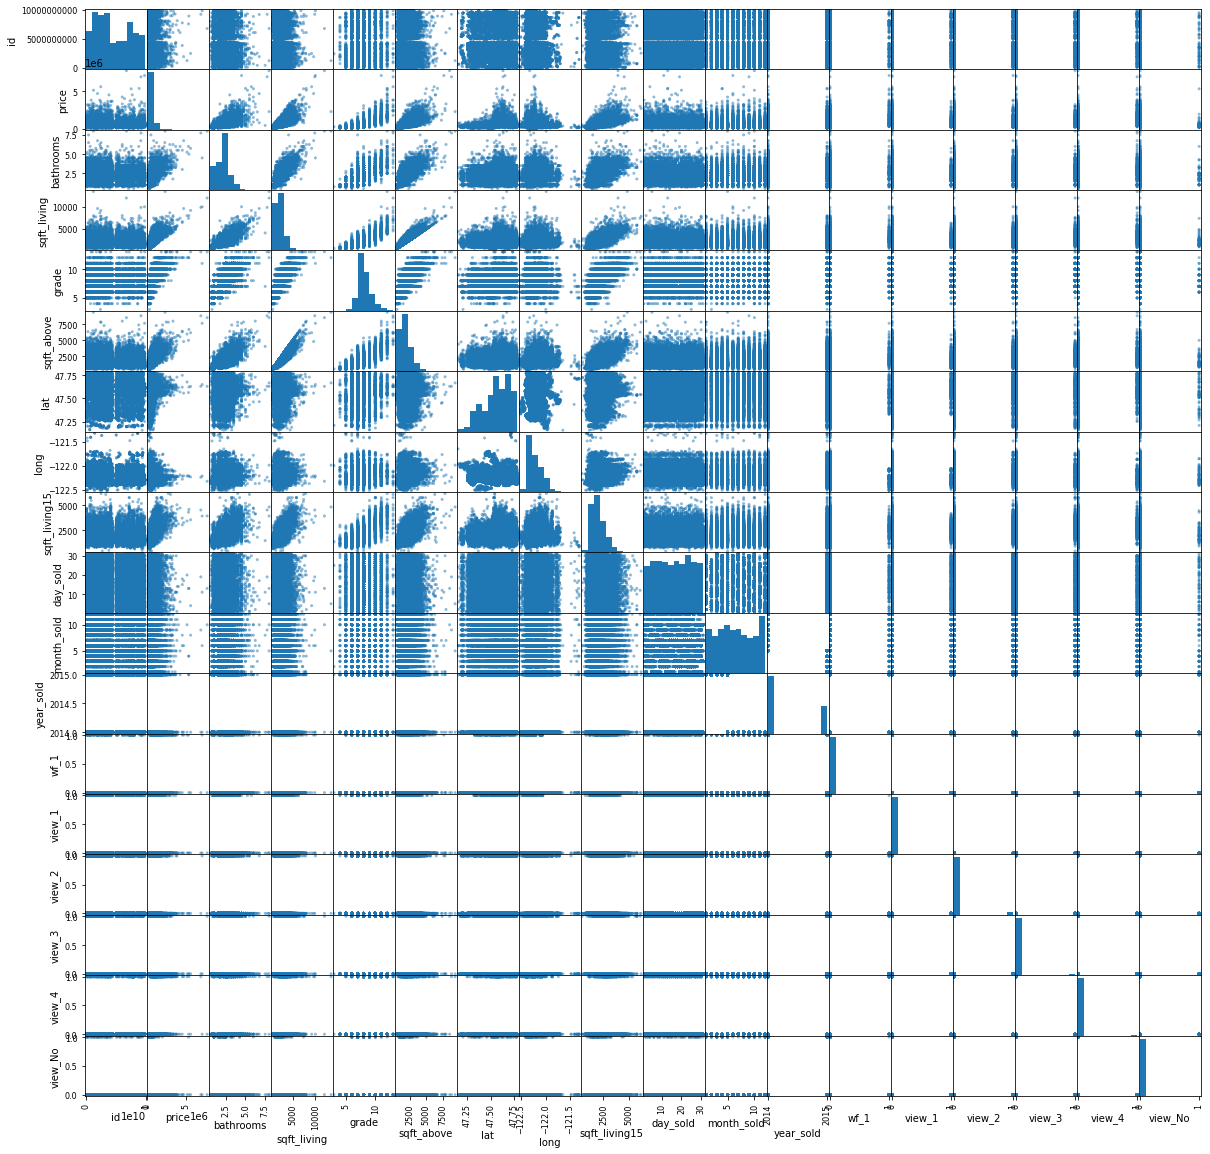

In [32]:
pd.plotting.scatter_matrix(df_prep,figsize  = [20, 20]);
plt.show()

In [33]:
#Checking for collinearity 
df_prep.corr()

,id,price,bathrooms,sqft_living,grade,sqft_above,lat,long,sqft_living15,day_sold,month_sold,year_sold,wf_1,view_1,view_2,view_3,view_4,view_No
id,1.000000,-0.016772,0.005162,-0.012241,0.008188,-0.010799,-0.001798,0.020672,-0.002701,0.002143,-0.011572,0.009915,-0.003599,0.001599,0.014964,-0.012930,0.017723,-0.012062
price,-0.016772,1.000000,0.525906,0.701917,0.667951,0.605368,0.306692,0.022036,0.585241,-0.014684,-0.009928,0.003727,0.264306,0.092597,0.147179,0.182932,0.303059,0.012024
bathrooms,0.005162,0.525906,1.000000,0.755758,0.665838,0.686668,0.024280,0.224903,0.569884,-0.005169,0.007543,-0.026577,0.063629,0.037935,0.087022,0.111907,0.105789,0.002739
sqft_living,-0.012241,0.701917,0.755758,1.000000,0.762779,0.876448,0.052155,0.241214,0.756402,-0.007413,0.012112,-0.029014,0.104637,0.066582,0.133782,0.158322,0.166730,0.009948
grade,0.008188,0.667951,0.665838,0.762779,1.000000,0.756073,0.113575,0.200341,0.713867,-0.012588,0.008989,-0.030635,0.082818,0.048549,0.120708,0.141873,0.146188,0.007722
sqft_above,-0.010799,0.605368,0.686668,0.876448,0.756073,1.000000,-0.001199,0.344842,0.731767,-0.002684,0.010153,-0.023782,0.071778,0.022144,0.076569,0.091583,0.106178,0.000878
lat,-0.001798,0.306692,0.024280,0.052155,0.113575,-0.001199,1.000000,-0.135371,0.048679,-0.015350,0.014995,-0.029003,-0.012157,0.017462,0.005015,-0.013364,0.013935,-0.011572
long,0.020672,0.022036,0.224903,0.241214,0.200341,0.344842,-0.135371,1.000000,0.335626,-0.007564,-0.008404,0.000296,-0.037628,-0.063869,-0.039407,-0.032402,-0.042887,-0.004473
sqft_living15,-0.002701,0.585241,0.569884,0.756402,0.713867,0.731767,0.048679,0.335626,1.000000,-0.008825,0.002513,-0.021549,0.083823,0.076485,0.138497,0.162084,0.152184,0.008644
day_sold,0.002143,-0.014684,-0.005169,-0.007413,-0.012588,-0.002684,-0.015350,-0.007564,-0.008825,1.000000,-0.060771,-0.006089,0.013719,-0.001743,0.006100,0.001513,0.010705,0.007824


In [34]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking

corr_df=df_prep.drop('price', axis=1).corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
corr_df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
corr_df.drop_duplicates(inplace=True)
corr_df[(corr_df.cc>.75) & (corr_df.cc <1)]

,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(month_sold, year_sold)",0.782325
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(sqft_above, grade)",0.756073
"(bathrooms, sqft_living)",0.755758


In [ ]:
#Build a model on the selected features 
outcome = 'price'
predictors = df_prep.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=df_prep).fit()
model.summary()

In [ ]:
#Testing our model
X_1 = df_prep.drop('price', axis=1)
y_1 = df_prep['price']
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1,y_1, random_state=55)
model_1= LinearRegression()
model_1.fit(X1_train, y1_train)

y1_hat_train = model_1.predict(X1_train)
y1_hat_test = model_1.predict(X1_test)

from sklearn.metrics import mean_squared_error
train_mse_1 = mean_squared_error(y1_train, y1_hat_train)
test_mse_1 = mean_squared_error(y1_test, y1_hat_test)
RSME_1 = test_mse_1 - train_mse_1
print('Train Mean Squared Error:', train_mse_1)
print('Test Mean Squared Error:', test_mse_1)
print('RMSE:', RSME_1)

In [ ]:
bathrooms_dummies = pd.get_dummies(df['bathrooms'], prefix='br', drop_first=True)
grade_dummies = pd.get_dummies(df['grade'], prefix='grade', drop_first=True)
non_colin_df = non_colin_df.drop(['bathrooms','grade' ], axis=1)
final_df = pd.concat([scaled_df, bathrooms_dummies, grade_dummies], axis=1)
final_df

In [35]:
final_df.columns = ['price', 'sqft_living_sc', 'sqft_living15_sc', 'br_0_75', 'br_1',
       'br_1_25', 'br_15', 'br_1_75', 'br_2', 'br_2_25', 'br_2_5',
       'br_2_75', 'br_3', 'br_3_25', 'br_3_5', 'br_3_75', 'br_4',
       'br_4_25', 'br_4_5', 'br_4_75', 'br_5', 'br_5_25', 'br_5_5',
       'br_5_75', 'br_6', 'br_6_25', 'br_6_5', 'br_6_75', 'br_7_5',
       'br_7_75', 'br_8', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12', 'grade_13']

NameError: name 'final_df' is not defined

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***